


# <span style="color:rgb(213,80,0)">Primer examen parcial</span>

***ALUMNO: ROMEO HERNANDEZ VILLA***

***CARRERA: INGENIERIA MECATRONICA***

***MATERIA: ROBOTICA***

***GRUPO: 01***

***PROFESOR: M.I. Erik Peña Medina***



# Resumen

En este trabajo se desarrollaron los modelos matemáticos completos, cinemáticos y dinámicos, para un robot manipulador tipo SCARA. Se utilizó el método de transformaciones homogéneas para obtener los modelos de postura, velocidad y aceleración, y la formulación de Euler-Lagrange para derivar el modelo dinámico. Como resultado, se obtuvieron las ecuaciones simbólicas que describen el comportamiento del robot, incluyendo la matriz de inercia y los vectores de Coriolis y gravedad. Estos modelos son esenciales para la futura simulación y diseño de controladores para el robot.

# 1. Introduccion

El propósito de este reporte es aplicar los fundamentos teóricos de la asignatura de Robótica para desarrollar el **modelo matemático completo**, tanto cinemático como dinámico, de un robot manipulador tipo SCARA. Este proceso es fundamental, ya que permite analizar, diseñar y evaluar los aspectos relacionados con el movimiento y control de un robot antes de su implementación física.

Siguiendo el planteamiento del curso, este trabajo busca aplicar la **comprensión** teórica de la descripción espacial hasta la **aplicación** y el **análisis** de los modelos en un entorno de software. Para ello, se utilizará el método de **transformaciones homogéneas** para establecer los modelos cinemáticos de postura, velocidad y aceleración. Posteriormente, se aplicará la formulación de **Euler-Lagrange** para derivar el modelo dinámico, que describe la física del movimiento del robot. El análisis se centrará en la **configuración RRR** del SCARA, correspondiente a sus grados de libertad rotacionales en el plano.

Todos los modelos se desarrollarán de manera simbólica utilizando MATLAB, lo que permite un análisis general y preciso del comportamiento del sistema. El reporte está estructurado para presentar secuencialmente el modelado cinemático de la postura, de las velocidades y de las aceleraciones, seguido por el modelado dinámico y, finalmente, las conclusiones derivadas de este análisis.


**¿Por qué RRR?**

Aunque los robots SCARA industriales suelen incluir un movimiento vertical (siendo RRP o RRPR), el modelo desarrollado en este reporte se enfoca en la **cinemática plana** que define la posición $(x, y)$ y la orientación $\phi$ del efector final. Esta pose es determinada por **tres articulaciones rotacionales (Revolute)** consecutivas:

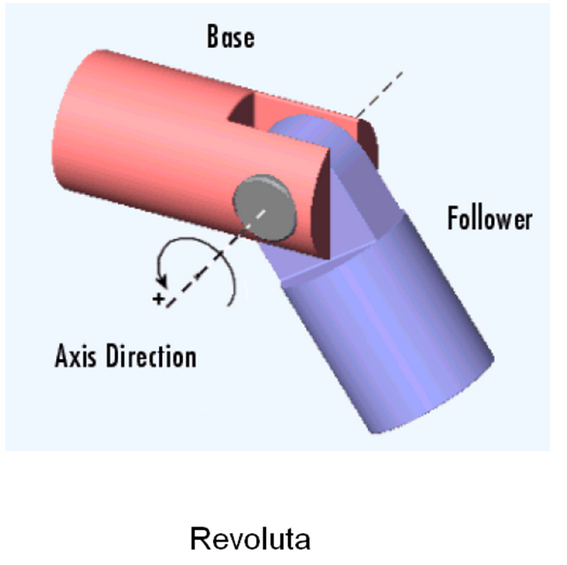

1.  **R:** Rotación de la base ($\theta_{O,1}$).
2.  **R:** Rotación del primer codo ($\theta_{1,2}$).
3.  **R:** Rotación del segundo codo/muñeca ($\theta_{2,3}$).

Por lo tanto, desde la perspectiva de la cadena cinemática que afecta al vector de postura $\xi_{O\_P} = [x; y; \phi]$, la configuración analizada se comporta como un **RRR**.

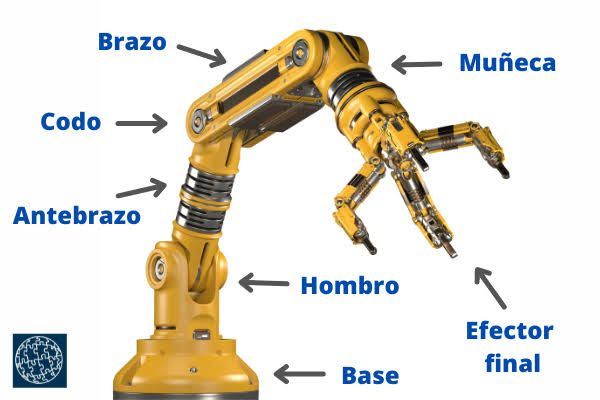


**Definicion de funciones**

Antes de modelar el robot, se define la herramienta matemática fundamental: la **matriz de transformación homogénea**. Se crea una función simbólica en MATLAB, `Tij`, que representa una transformación general 4x4 para describir la posición ($x, y, z$) y la orientación (ángulos $\alpha, \beta, \gamma$) de un sistema de coordenadas $\{j\}$ respecto a uno anterior $\{i\}$.

$$
T_{i \to j}(x, y, z, \gamma, \beta, \alpha) = \begin{pmatrix} R_{z}(\alpha)R_{y}(\beta)R_{x}(\gamma) & \begin{pmatrix} x \\ y \\ z \end{pmatrix} \\ \begin{matrix} 0 & 0 & 0 \end{matrix} & 1 \end{pmatrix}
$$

La forma extendida de la matriz de rotación resultante de multiplicar $R_{z}(\alpha)R_{y}(\beta)R_{x}(\gamma)$ es:

$$
R_{z}(\alpha)R_{y}(\beta)R_{x}(\gamma) =
\begin{pmatrix}
\cos\alpha\cos\beta & \cos\alpha\sin\beta\sin\gamma - \sin\alpha\cos\gamma & \cos\alpha\sin\beta\cos\gamma + \sin\alpha\sin\gamma \\
\sin\alpha\cos\beta & \sin\alpha\sin\beta\sin\gamma + \cos\alpha\cos\gamma & \sin\alpha\sin\beta\cos\gamma - \cos\alpha\sin\gamma \\
-\sin\beta & \cos\beta\sin\gamma & \cos\beta\cos\gamma
\end{pmatrix}
$$

$$
T_{i \to j}(x_{i \to j}, y_{i \to j}, z_{i \to j}, \gamma_{i \to j}, \beta_{i \to j}, \alpha_{i \to j}) =
\begin{pmatrix}
c\alpha c\beta & c\alpha s\beta s\gamma - s\alpha c\gamma & s\alpha s\gamma + c\alpha s\beta c\gamma & x_{i \to j} \\
s\alpha c\beta & c\alpha c\gamma + s\alpha s\beta s\gamma & s\alpha s\beta c\gamma - c\alpha s\gamma & y_{i \to j} \\
-s\beta & c\beta s\gamma & c\beta c\gamma & z_{i \to j} \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Esta función será la base para construir el modelo cinemático del robot.
A continuación, se define una función simbólica en MATLAB llamada Tij. Esta función representa una transformación homogénea general de 4x4, la cual permite describir la posición (x, y, z) y la orientación (mediante los ángulos de Euler α, β, γ) de un sistema de coordenadas {j} con respecto a un sistema de referencia {i}.

Esta función será la base para construir el modelo cinemático del robot, ya que nos permitirá "encadenar" las transformaciones desde la base hasta el efector final, eslabón por eslabón.




**Deficición de la función de manera simbolica y definición de la transformación homógenea general**

In [38]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1];
disp(Tij)


Este bloque de código inicial define la herramienta matemática esencial para el modelado cinemático: la **matriz de transformación homogénea general**.

* `syms Tij(...)`: Declara `Tij` como una **función simbólica** en MATLAB. Esto permite trabajar con las ecuaciones de forma algebraica.
* `Tij(...) = [...]`: Define la **fórmula matemática** de la matriz de transformación homogénea `Tij` de 4x4.
    * **Entradas:** La función toma seis argumentos simbólicos:
        * `x_i_j, y_i_j, z_i_j`: Representan la **traslación** (posición) del origen del sistema de coordenadas `{j}` con respecto al sistema `{i}`.
        * `gi_j, bi_j, ai_j`: Representan los **ángulos de Euler** (probablemente $\gamma, \beta, \alpha$ o roll, pitch, yaw) que definen la **orientación** del sistema `{j}` con respecto al sistema `{i}`.
    * **Salida:** La matriz resultante combina una **matriz de rotación** de 3x3 (construida a partir de los ángulos) y un **vector de traslación** de 3x1 en una única matriz de 4x4.
* **Propósito:** Esta función `Tij` servirá como una plantilla general para construir las matrices de transformación específicas de cada articulación del robot SCARA en los pasos siguientes.


**Modelado del robot SCARA**

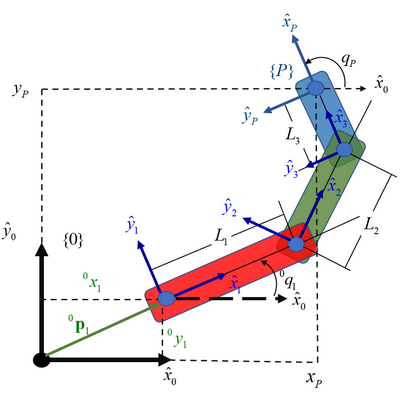

Figura 1. Diagrama cinemático del robot SCARA

Se ilustra la estructura del manipulador, compuesto por eslabones rígidos conectados por articulaciones. Se muestran los sistemas de coordenadas asignados a la base ({O}) y a cada articulación, junto con las longitudes de los eslabones ($L_1, L_2, L_3$) y las variables articulares ($\theta_{O,1}, \theta_{1,2}, \theta_{2,3}$) utilizadas para el modelado cinemático.


## 2. Modelado Cinemático de la Postura

Describe la relación geométrica entre las variables articulares ($\theta$) y la pose (posición y orientación) del efector final.

**Modelo Cinemático Directo (MCD)**

Calcula la pose del efector final a partir de los ángulos articulares, usando **transformaciones homogéneas sucesivas**. Se definen las transformaciones para el robot SCARA.

Para el robot SCARA de este reporte, se definen las siguientes transformaciones:

-Sistema{0} al sistema {1}

-Sistema{1} al sistema {2}

-Sistema{2} al sistema {3}

-Sistema{3} al sistema {P}



In [3]:
% Planteamiento del modelo cinemático de la posición--Sistema{0} al sistema {1}
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1;
T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1);
Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

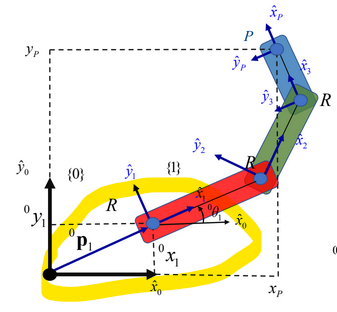

Figura 2. Sistema {0} al sistema {1}

In [4]:
% Sistema{1} al sistema {2}
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2);
Tij(L_1,0,0,0,0,theta_1_2)

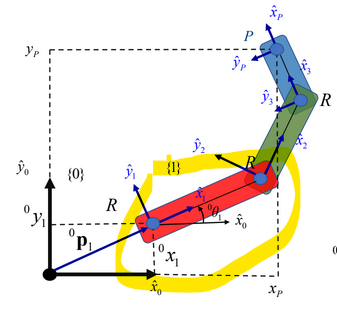

Figura 3. Sistema {1} al sistema {2}

In [5]:
%Sistema{2} al sistema {3}
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3);
 Tij(L_2,0,0,0,0,theta_2_3)


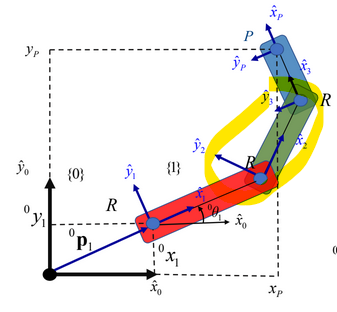

Figura 4. Sistema {2} al sistema {3}

In [6]:
%Sistema{3} al sistema {P}
T_3_P = Tij(L_3,0,0,0,0,0);
Tij(L_3,0,0,0,0,0)


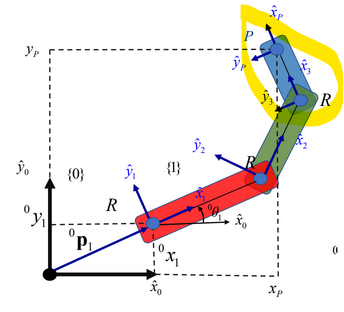

Figura 5. Sistema {3} al sistema {P}

Esta línea de código calcula la **matriz de transformación homogénea total** `T_O_P`, la cual describe la **posición y orientación** del efector final `{P}` con respecto a la base del robot `{O}`. Para obtenerla, **multiplica secuencialmente** las matrices de transformación individuales de cada eslabón (`T_O_1`, `T_1_2`, etc.). Finalmente, la función `simplify()` se aplica para **reducir la complejidad matemática** de la matriz resultante, haciéndola más compacta y manejable.

In [7]:

T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P);
simplify(T_O_1*T_1_2*T_2_3*T_3_P)


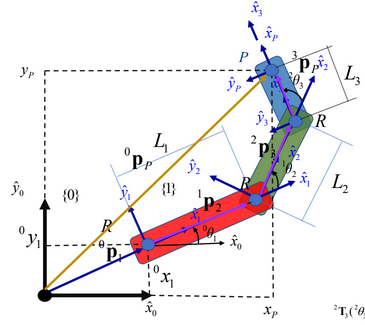

Figura 6. Sistema de transformacion total del sistema {0} al sistema {p}

La multiplicación de estas matrices da como resultado la matriz de transformación total T_O_P. A partir de esta, se extrae el vector de postura xi_O_P, que representa el Modelo Cinemático Directo (MCD).
<p style="text-align:center;">
  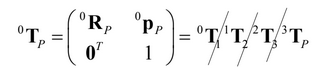
</p>
La transformación total $T_{O \to P}$ se obtiene multiplicando las matrices individuales:
$$
T_{O \to P} = T_{O \to 1} \cdot T_{1 \to 2} \cdot T_{2 \to 3} \cdot T_{3 \to P}
$$

**Vector de postura del robot**

A partir de la matriz de transformación homogénea total `T_O_P`, se extrae el **vector de postura** `xi_O_P`. Este vector de $3 \times 1$ representa la pose del efector final en el plano, conteniendo su posición en coordenadas cartesianas $(x, y)$ —obtenidas de los elementos $(1,4)$ y $(2,4)$ de `T_O_P`— y su orientación final ($\phi$), que para esta configuración SCARA es la suma de los ángulos de las articulaciones. Este vector define completamente el **Modelo Cinemático Directo (MCD)**.


In [8]:
%Vector de postura del robot

xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3];
[T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

**Modelo Cinemático Inverso (MCI)** 

Este modelo resuelve el problema opuesto al MCD: calcula los **valores de las variables articulares** ($\theta_{1\_2}, \theta_{O\_1}$) necesarios para que el efector final alcance una **coordenada deseada** $(x, y)$ en el espacio de trabajo. Para el robot SCARA, este problema se resuelve de forma analítica utilizando relaciones geométricas y trigonométricas, como se implementa en el siguiente código. La función `atan2` se utiliza para obtener los ángulos de forma robusta en los cuatro cuadrantes, y `simplify` presenta los resultados de manera compacta.

In [9]:
% Modelo Cinemático Inverso (MCI)
syms x y L_1 L_2

% Solución para theta_1_2
cos_theta_1_2 = (x^2 + y^2 - L_1^2 - L_2^2) / (2*L_1*L_2);
theta_1_2_sol = atan2(sqrt(1 - cos_theta_1_2^2), cos_theta_1_2);

% Solución para theta_O_1
k1 = L_1 + L_2*cos(theta_1_2_sol);
k2 = L_2*sin(theta_1_2_sol);
theta_O_1_sol = atan2(y, x) - atan2(k2, k1);

simplify(theta_1_2_sol)
simplify(theta_O_1_sol)

Para justificar visualmente estas transformaciones, el siguiente diagrama cinemático ilustra la estructura del robot, incluyendo los sistemas de coordenadas, las longitudes de los eslabones y las variables articulares utilizadas en el modelo.

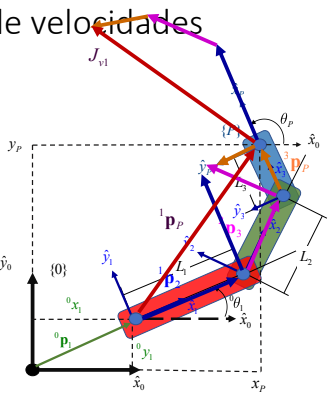

Figura 7. Diagrama cinemático del robot SCARA. Se muestran los sistemas de coordenadas {0} a {4}, las longitudes de los eslabones (l1​,l2​) y las variables articulares (q1​,q2​,d3​,q4​) utilizadas para el modelado cinemático. Nota: l1​,l2​ corresponden a L1​,L2​ y q1​,q2​,q3​ corresponden a θO,1​,θ1,2​,θ2,3​ en el código MATLAB.

# 3. Modelado Cinemático de las Velocidades

El modelo cinemático de velocidades establece la relación entre las velocidades de las articulaciones del robot (q˙​) y la velocidad lineal y angular del efector final (ξ˙​). Esta relación se define a través de una matriz fundamental en robótica conocida como la matriz Jacobiana (J).

La ecuación principal que gobierna este modelo es: ξ˙​=J(q)⋅q˙​

**Modelo cinemático directo de las velocidades**

El modelo directo permite calcular la velocidad del efector final si se conocen las velocidades de cada una de las articulaciones. Para obtener la matriz Jacobiana, se deriva el vector de postura (xi_O_P) con respecto a cada una de las variables articulares, como se muestra en el siguiente código:

In [10]:
% Modelo cinemático directo de las velocidades
syms J_theta
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3]);
jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


Este código calcula la **matriz Jacobiana** (`J_theta`) del robot. La función `jacobian` toma el **vector de postura** (`xi_O_P`, que contiene las ecuaciones de posición x, y, φ de la punta del robot) y lo **deriva parcialmente** con respecto a cada **ángulo de las articulaciones** (`theta_O_1`, `theta_1_2`, `theta_2_3`). El resultado es una **matriz** que relaciona la **velocidad** de giro de los motores con la **velocidad** final de la punta del robot.

**Modelo Cinemático Inverso de las Velocidades**

El modelo inverso resuelve el problema opuesto: calcula las velocidades que deben tener las articulaciones para que el efector final se mueva a una velocidad deseada. Este modelo se obtiene calculando la inversa de la matriz Jacobiana.

Es importante destacar que esta matriz inversa no existe en ciertas configuraciones del robot conocidas como singularidades (por ejemplo, cuando el brazo está completamente extendido), puntos en los que el robot pierde grados de libertad.

In [11]:
% Modelo cinemático inverso de las velocidades
inv(J_theta)

Esta línea de código calcula la **inversa de la matriz Jacobiana** (`J_theta`) que se obtuvo en el paso anterior.

Esto representa el resultado es la matriz $J^{-1}$, que define el **Modelo Cinemático Inverso de las Velocidades**.,la cual nos permite calcular las **velocidades** ($\dot{q}$) que deben tener las **articulaciones** del robot para que su efector final se mueva a una **velocidad** ($\dot{\xi}$) deseada en el espacio cartesiano, según la ecuación $\dot{q} = J^{-1} \cdot \dot{\xi}$.
* **Importante:** Esta matriz inversa no se puede calcular si el robot está en una **singularidad** (cuando el determinante de $J$ es cero).

  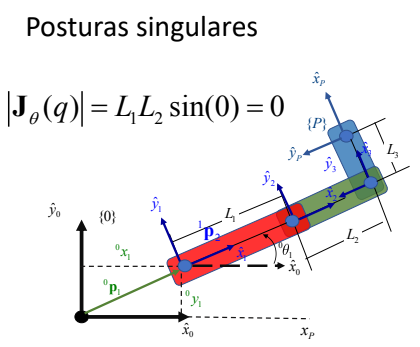 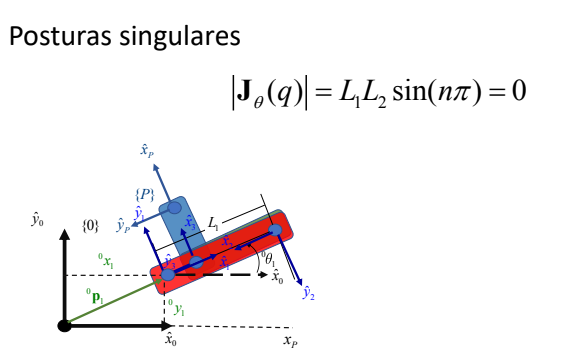

Figura 8: Robot SCARA en una postura singular.

En esta configuración extendida, el robot pierde grados de libertad en el espacio cartesiano, haciendo que la matriz Jacobiana deje de ser invertible. Esto significa que ciertas velocidades del efector final no pueden ser alcanzadas, o bien, requieren velocidades articulares infinitas.

  

# 4. Modelado Cinemático de las Aceleraciones

El **modelo de aceleraciones** es una extensión del de velocidades y se obtiene derivándolo con respecto al tiempo. Este modelo relaciona las **aceleraciones de las articulaciones** ($\ddot{q}$) con la **aceleración del efector final** ($\ddot{\xi}$). La ecuación fundamental requiere tanto la **matriz Jacobiana** ($J$) como su **derivada temporal** ($\dot{J}$).

**Modelo Cinemático Directo de las Aceleraciones**

El **modelo directo**, expresado como $\ddot{\xi} = \dot{J}(q, \dot{q})\dot{q} + J(q)\ddot{q}$, permite calcular la **aceleración del efector final** a partir de las **velocidades y aceleraciones de las articulaciones**. El primer paso es calcular la **derivada del Jacobiano** ($\dot{J}$) mediante la **regla de la cadena**.


In [36]:
% 2. Cálculo de la derivada del Jacobiano (J_dot) respecto al tiempo.
J_dot = sym(zeros(size(J_theta)));
for i = 1:length(q_accel)
    J_dot = J_dot + diff(J_theta, q_accel(i)) * q_dot_accel(i);
end
sym(zeros(size(J_theta)))
 J_dot + diff(J_theta, q_accel(i)) * q_dot_accel(i)

Este bloque de código calcula la **derivada temporal de la matriz Jacobiana** ($\dot{J}$), necesaria para el modelo de aceleraciones.

* **Inicialización:** `J_dot = sym(zeros(size(J_theta)))` crea una matriz simbólica de ceros del mismo tamaño que el Jacobiano (`J_theta`) para almacenar el resultado.
* **Bucle (Chain Rule):** El `for` loop implementa la regla de la cadena para calcular $\dot{J} = \sum_{i=1}^{n} \frac{\partial J}{\partial q_i} \dot{q}_i$.
    * `diff(J_theta, q_accel(i))`: Calcula la derivada parcial de la matriz Jacobiana ($J$) con respecto a la i-ésima variable articular ($q_i$).
    * `* q_dot_accel(i)`: Multiplica esta derivada parcial por la i-ésima velocidad articular ($\dot{q}_i$).
    * `J_dot = J_dot + ...`: Acumula la suma de estos términos en la variable `J_dot`.


In [13]:
%Modelo cinematico de aceleraciones

% 1. Definimos las velocidades y aceleraciones articulares como variables simbólicas.
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3
q_accel = [theta_O_1; theta_1_2; theta_2_3];
[theta_O_1; theta_1_2; theta_2_3]
q_dot_accel = [theta_dot_O_1; theta_dot_1_2; theta_dot_2_3];
[theta_dot_O_1; theta_dot_1_2; theta_dot_2_3]
q_ddot_accel = [theta_ddot_O_1; theta_ddot_1_2; theta_ddot_2_3];
[theta_ddot_O_1; theta_ddot_1_2; theta_ddot_2_3]


Este bloque de código prepara las variables necesarias para el modelo cinemático de aceleraciones. Específicamente:

**Define Velocidades Simbólicas:** Declara variables simbólicas (theta_dot_O_1, etc.) para representar las velocidades angulares de cada articulación.

**Define Aceleraciones Simbólicas:** Declara variables simbólicas (theta_ddot_O_1, etc.) para representar las aceleraciones angulares de cada articulación.

**Crea Vectores:** Organiza las variables de posición, velocidad y aceleración en vectores simbólicos:

q_accel: Vector de posiciones articulares.

q_dot_accel: Vector de velocidades articulares.

q_ddot_accel: Vector de aceleraciones articulares.

In [14]:
% 3. Modelo Cinemático Directo de Aceleraciones a = J_dot*q_dot + J*q_ddot

a_P = J_dot * q_dot_accel + J_theta * q_ddot_accel;
J_dot * q_dot_accel + J_theta * q_ddot_accel
simplify(J_dot);
simplify(J_dot)
simplify(a_P);
simplify(a_P)

Este bloque de código calcula el **Modelo Cinemático Directo de las Aceleraciones** (`a_P`), que determina la aceleración del efector final del robot.

* Implementa la fórmula $\ddot{\xi} = \dot{J}\dot{q} + J\ddot{q}$ utilizando las variables calculadas previamente:
    * `J_dot`: La derivada temporal de la matriz Jacobiana.
    * `q_dot_accel`: El vector de velocidades angulares de las articulaciones.
    * `J_theta`: La matriz Jacobiana.
    * `q_ddot_accel`: El vector de aceleraciones angulares de las articulaciones.
* Las líneas con `simplify()` se utilizan para reducir las expresiones simbólicas de $\dot{J}$ y $\ddot{\xi}$ (`a_P`) a su forma más compacta y legible. 

**Modelo Cinemático Inverso de las Aceleraciones**

El **modelo inverso** calcula las **aceleraciones articulares** ($\ddot{q}$) necesarias para lograr una **aceleración deseada** ($\ddot{\xi}$) en el **efector final**. Se obtiene despejando $\ddot{q}$ de la ecuación directa:
$$
\ddot{q} = J(q)^{-1}(\ddot{\xi} - \dot{J}(q, \dot{q})\dot{q})
$$

In [15]:
% Modelo cinematico de las aceleraciones inverso
syms ddx1 ddx2 ddx3 real
ddx_vec = [ddx1; ddx2; ddx3];
[ddx1; ddx2; ddx3]

% Se usan las variables J_dot y q_dot_accel
ddq_inv = simplify(pinv(J_theta) * (ddx_vec - J_dot * q_dot_accel));
simplify(pinv(J_theta) * (ddx_vec - J_dot * q_dot_accel))

Este bloque de código calcula el **Modelo Cinemático Inverso de las Aceleraciones** (`ddq_inv`).

* **Define Aceleraciones Cartesianas Deseadas:** Primero, define variables simbólicas (`ddx1`, `ddx2`, `ddx3`) para la **aceleración deseada** del efector final en el espacio cartesiano y las agrupa en el vector `ddx_vec`.
* **Calcula Aceleraciones Articulares:** Luego, implementa la fórmula $\ddot{q} = J^{-1}(\ddot{\xi} - \dot{J}\dot{q})$ para encontrar las **aceleraciones articulares** (`ddq_inv`) requeridas. Utiliza la **pseudoinversa** del Jacobiano (`pinv(J_theta)`) para mayor robustez numérica, resta el término $\dot{J}\dot{q}$ (representado por `J_dot * q_dot_accel`), y **simplifica** el resultado final.



# 5. El Modelado Dinámico

El **modelo dinámico** describe la física del movimiento del robot, estableciendo la relación entre los **pares (torques)** aplicados en los motores y las **posiciones, velocidades y aceleraciones** resultantes en las articulaciones. Este modelo es crucial para el diseño de **controladores avanzados** y para la **simulación precisa** del comportamiento del robot.

Para derivar este modelo, se utiliza la formulación de **Euler-Lagrange**, un método basado en la **energía del sistema**. Este enfoque consiste en calcular la **energía cinética (K)** y la **energía potencial (U)** de cada eslabón para construir una función llamada **Lagrangiano (L = K - U)**.


**Modelo Dinámico Inverso**

El **modelo dinámico inverso** permite calcular los **torques** ($\tau$) necesarios en cada articulación para producir un movimiento deseado (una **aceleración** $\ddot{q}$ específica). La ecuación general que define este modelo es:

$$
\tau = M(q)\ddot{q} + C(q, \dot{q})\dot{q} + G(q)
$$

Donde:
* **$M(q)$** es la **matriz de inercia** del robot.
* **$C(q, \dot{q})\dot{q}$** es el **vector de pares generados por las fuerzas centrípetas y de Coriolis**.
* **$G(q)$** es el **vector de pares debidos a la gravedad**.

El siguiente bloque de código implementa el procedimiento de **Euler-Lagrange** completo, calculando las velocidades de los centros de masa, las velocidades angulares, las energías y, finalmente, las ecuaciones para los pares que definen el modelo inverso.


In [3]:
% Modelo dinámico por ecuaciones de Eüler-Lagrange
syms x_1_C1 theta_dot_O_1
v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0];
[0;x_1_C1*theta_dot_O_1;0]
v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0];
[-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]
transpose(v_C1_C1)*v_C1_C1
simplify(transpose(v_O_C1)*v_O_C1)

Unrecognized function or variable 'theta_O_1'.

Se inicia el **modelo dinámico** utilizando el método de **Euler-Lagrange**. Primero, se definen las variables simbólicas necesarias, como la distancia al centro de masa del primer eslabón (`x_1_C1`) y su velocidad angular (`theta_dot_O_1`). Luego, se calculan:

* `v_C1_C1`: La velocidad del centro de masa del primer eslabón con respecto a su propio sistema de coordenadas (generalmente {1}).
* `v_O_C1`: La velocidad del centro de masa del primer eslabón con respecto al sistema de coordenadas base {O}, obtenida al transformar `v_C1_C1`.
* Finalmente, se calcula el **cuadrado de la magnitud** de estas velocidades (`transpose(v)*v`), simplificando el resultado para `v_O_C1`. Este término es un paso intermedio crucial para calcular la **energía cinética traslacional** del primer eslabón ($K_{tras} = \frac{1}{2}m v^T v$).

In [17]:
% Cálculo de la posición de los centros de masa
syms x_1_C1 x_2_C2 x_3_C3
T_1_C1 = Tij(x_1_C1,0,0,0,0,0);
Tij(x_1_C1,0,0,0,0,0)
T_O_C1 = T_O_1*T_1_C1;
T_O_1*T_1_C1
T_2_C2 = Tij(x_2_C2,0,0,0,0,0);
Tij(x_2_C2,0,0,0,0,0)
T_O_C2 = T_O_1*T_1_2*T_2_C2;
T_O_1*T_1_2*T_2_C2
T_3_C3 = Tij(x_3_C3,0,0,0,0,0);
Tij(x_3_C3,0,0,0,0,0)
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3;
T_O_1*T_1_2*T_2_3*T_3_C3


Para calcular la energía cinética y potencial de cada eslabón, es necesario conocer la **posición de sus centros de masa** ($C_1, C_2, C_3$) con respecto al sistema de referencia base {O}.

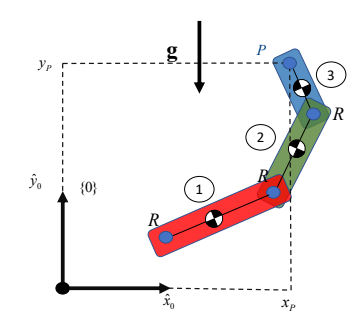

Figura 9 . Considerancion de los centros de masa de cada eslabon

* **Variables:** Se definen `x_1_C1`, `x_2_C2`, `x_3_C3` como las distancias simbólicas desde el origen del sistema de coordenadas de cada eslabón ({1}, {2}, {3}) hasta su respectivo centro de masa, asumiendo que este se encuentra a lo largo del eje x del eslabón.
* **Transformaciones Locales:** Se calculan las matrices `T_1_C1`, `T_2_C2`, `T_3_C3` que representan la transformación (una simple traslación en x) desde el sistema de coordenadas del eslabón hasta su centro de masa.
* **Transformaciones Globales:** Multiplicando las transformaciones cinemáticas obtenidas previamente (`T_O_1`, `T_O_1*T_1_2`, etc.) por las transformaciones locales, se obtienen las matrices `T_O_C1`, `T_O_C2`, `T_O_C3`. Estas matrices describen la **posición y orientación** del centro de masa de cada eslabón directamente con respecto a la base del robot {O}.



In [18]:
%Vectores de posición
p_O_C1  = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)];
[T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)]);
simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])
p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)]);
simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])


A partir de las matrices de transformación homogénea globales (`T_O_C1`, `T_O_C2`, `T_O_C3`), se extraen los **vectores de posición** que localizan cada centro de masa ($C_1, C_2, C_3$) con respecto al sistema base {O}.

* **Extracción:** Se toman los elementos $(1,4)$, $(2,4)$, y $(3,4)$ de la última columna de cada matriz `T_O_Ci` para formar los vectores `p_O_C1`, `p_O_C2`, y `p_O_C3`.
* **Simplificación:** La función `simplify()` se aplica a `p_O_C2` y `p_O_C3` para presentar las ecuaciones de posición de la forma más compacta posible.



In [19]:
% Cálculo de las velocidades
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3
v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3;
diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3;
diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3;
diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3



Para calcular la energía cinética, se necesitan las **velocidades lineales** de los centros de masa ($v_{O\_C1}, v_{O\_C2}, v_{O\_C3}$) con respecto al sistema base {O}. Estas se obtienen derivando los **vectores de posición** ($p_{O\_C1}, p_{O\_C2}, p_{O\_C3}$) con respecto al tiempo, aplicando la **regla de la cadena**:

$$
\dot{p}_{O\_Ci} = \sum_{j=1}^{3} \frac{\partial p_{O\_Ci}}{\partial \theta_j} \dot{\theta}_j
$$

* **Variables:** Se definen las **velocidades angulares** de las articulaciones como variables simbólicas (`theta_dot_O_1`, `theta_dot_1_2`, `theta_dot_2_3`).
* **Derivación:** La función `diff(p, theta)` calcula la derivada parcial del vector de posición $p$ con respecto a cada ángulo $\theta_j$.
* **Cálculo de Velocidad:** Se multiplica cada derivada parcial por la velocidad angular correspondiente ($\dot{\theta}_j$) y se suman los términos para obtener la velocidad lineal total de cada centro de masa ($v_{O\_C1}, v_{O\_C2}, v_{O\_C3}$).



In [20]:
%Cálculo de la velocidades angulares%
syms omega_1_1 omega_2_2 omega_3_3

%Propagación para el primer cuerpo
omega_1_1;
omega_O_O = [0;0;0]
n_1_1 = [0;0;1]
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)];
[T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]
R_1_O = transpose(R_O_1);
transpose(R_O_1)

%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1;
disp(omega_1_1)

omega_O_O = 3×1 double
     0
     0
     0

n_1_1 = 3×1 double
     0
     0
     1

## Cálculo de las Velocidades Angulares

Para el modelo dinámico, también se requieren las **velocidades angulares** ($\omega_1, \omega_2, \omega_3$) de cada eslabón con respecto a su propio sistema de coordenadas. Estas se calculan utilizando el método de **propagación de velocidades angulares**.

**Propagación para el Primer Cuerpo ($\omega_1$)**

Se calcula la velocidad angular del primer eslabón ({1}) con respecto a sí mismo.

* **Variables:** Se definen las velocidades angulares como simbólicas (`omega_1_1`, etc.).
* **Condición Inicial:** La velocidad angular de la base ({O}) se considera cero (`omega_O_O = [0;0;0]`).
* **Eje de Rotación:** Se define el eje de rotación de la primera articulación respecto al sistema {1} (`n_1_1 = [0;0;1]`, asumiendo rotación en Z).
* **Matrices de Rotación:** Se extrae la matriz de rotación `R_O_1` de la transformación `T_O_1` y se calcula su transpuesta `R_1_O` (que representa la rotación de {O} visto desde {1}).
* **Ecuación de Propagación:** Se aplica la fórmula $\omega_{i} = R_{i \leftarrow i-1} \omega_{i-1} + \dot{q}_i \hat{Z}_i$ para encontrar la velocidad angular `omega_1_1` del eslabón 1 referida a su propio sistema de coordenadas {1}. En este caso, como $\omega_{O\_O}$ es cero, $\omega_{1\_1}$ es simplemente la velocidad de la primera articulación ($\dot{\theta}_{O,1}$) alrededor del eje Z local.



In [21]:
%Propagación para el segundo cuerpo
omega_2_2;
n_2_2 = [0;0;1]
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)];
[T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]
R_2_1 = transpose(R_1_2);
transpose(R_1_2)

%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2;
disp(omega_2_2)

n_2_2 = 3×1 double
     0
     0
     1

**Propagación para el Segundo Cuerpo ($\omega_2$)**

Se calcula la velocidad angular del segundo eslabón ({2}) con respecto a sí mismo, utilizando la velocidad angular del cuerpo anterior (`omega_1_1`).

* **Eje de Rotación:** Se define el eje de rotación de la segunda articulación respecto al sistema {2} (`n_2_2 = [0;0;1]`).
* **Matrices de Rotación:** Se extrae la matriz `R_1_2` (de {1} a {2}) de la transformación `T_1_2` y se calcula su transpuesta `R_2_1` (de {2} a {1}).
* **Ecuación de Propagación:** Se aplica la fórmula $\omega_{i} = R_{i \leftarrow i-1} \omega_{i-1} + \dot{q}_i \hat{Z}_i$. La velocidad angular del primer eslabón (`omega_1_1`) se transforma al sistema {2} usando `R_2_1`, y se le suma la velocidad angular relativa aportada por la segunda articulación (`n_2_2*theta_dot_1_2`). El resultado es `omega_2_2`.



In [22]:
%Propagación para el tercer cuerpo
omega_3_3;
n_3_3 = [0;0;1]
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)];
[T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]
R_3_2 = transpose(R_2_3);
transpose(R_2_3)

%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3;
disp(omega_3_3)
disp(v_O_C3)

n_3_3 = 3×1 double
     0
     0
     1

**Propagación para el Tercer Cuerpo ($\omega_3$)**

Se calcula la velocidad angular del tercer eslabón ({3}) con respecto a sí mismo, utilizando la velocidad angular del cuerpo anterior (`omega_2_2`).

* **Eje de Rotación:** Se define el eje de rotación de la tercera articulación respecto al sistema {3} (`n_3_3 = [0;0;1]`).
* **Matrices de Rotación:** Se extrae la matriz `R_2_3` (de {2} a {3}) de la transformación `T_2_3` y se calcula su transpuesta `R_3_2` (de {3} a {2}).
* **Ecuación de Propagación:** Se aplica la fórmula $\omega_{i} = R_{i \leftarrow i-1} \omega_{i-1} + \dot{q}_i \hat{Z}_i$. La velocidad angular del segundo eslabón (`omega_2_2`) se transforma al sistema {3} usando `R_3_2`, y se le suma la velocidad angular relativa aportada por la tercera articulación (`n_3_3*theta_dot_2_3`). El resultado es `omega_3_3`.
* **Salidas:** Las líneas `disp(omega_3_3)` y `disp(v_O_C3)` muestran las velocidades angular y lineal calculadas para el centro de masa del tercer eslabón.



In [23]:
% Defición de los elementos de inercia 
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3

%vector de gravedad
g_v = [0;-g;0]
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]

**Definición de los Elementos de Inercia de cada eslabon**
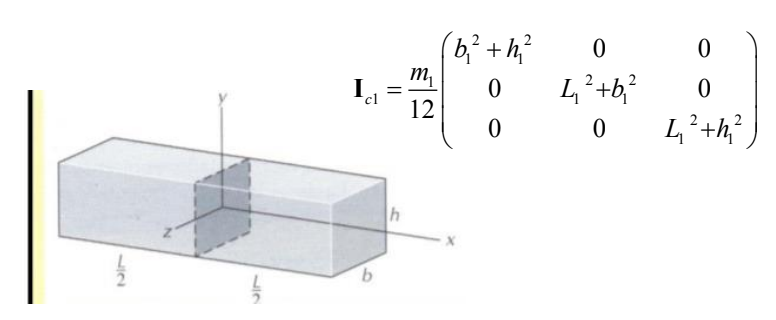

Figura 10. Las consideraciones que hay que hacer es que los eslabones son cuerpos rígidos ideales. Además, su forma es de prisma rectangular, de ahí es posible calcular la matriz de inercia de cada eslabón. Esto servirá para encontrar la energía cinética y potencial en los eslabones.

Este bloque de código define los **parámetros inerciales y gravitacionales** necesarios para el cálculo de las energías cinética y potencial en el método de Euler-Lagrange.

* **Variables Simbólicas:** Se declaran `g` (aceleración de la gravedad) y `I_xx1`, `I_yy1`, `I_zz1`, etc., como variables simbólicas. Estas últimas representan los **momentos principales de inercia** de cada eslabón (1, 2 y 3) respecto a los ejes x, y, z de su propio sistema de coordenadas, centrado en su centro de masa.
* **Vector de Gravedad:** Se define el vector `g_v = [0; -g; 0]`. Esto establece que la gravedad actúa únicamente en la **dirección negativa del eje Y** del sistema de coordenadas base {O}.
* **Tensores de Inercia:** Se definen las matrices `I_C1`, `I_C2`, `I_C3` como **tensores de inercia diagonales**. Esto asume que los ejes de los sistemas de coordenadas locales de cada eslabón coinciden con sus ejes principales de inercia, simplificando el cálculo de la energía cinética rotacional.

**NOTA**

Dado que la ecuacion **k_3** es muy larga y no se vizualiza bien en la salida que da jupyter notebook se uso la funcion disp() para mostrarla bien sin que se vaya al otro renglon.

In [24]:
%Cáculo del Lagrangeano
syms m_1 m_2 m_3

%energía cinética de cada uno de los cuerpos
k_1=simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

k_2=simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

disp('La ecuación completa para k_3 es:')
k_3=simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3);
disp(k_3)


La ecuación completa para k_3 es:


**Cálculo del Lagrangeano**

El **Lagrangeano (L)** es una función escalar fundamental en la mecánica Lagrangiana, definida como la **diferencia entre la energía cinética total (K) y la energía potencial total (U)** del sistema ($L = K - U$).

**Cálculo de la Energía Cinética (K)**

Primero, se calcula la energía cinética para cada uno de los tres eslabones ($k_1, k_2, k_3$) utilizando la fórmula general que suma la energía cinética traslacional y rotacional:

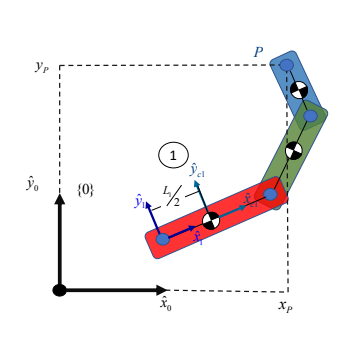

Figura 11. Se deben de considerar las energias cineticas de los 3 eslabones en el roboto SCARA.

$$
k_i = \frac{1}{2}m_i v_{O\_Ci}^T v_{O\_Ci} + \frac{1}{2}\omega_i^T I_{Ci} \omega_i
$$

Donde $m_i$ es la masa, $v_{O\_Ci}$ es la velocidad lineal del centro de masa respecto a la base, $\omega_i$ es la velocidad angular del eslabón respecto a su propio sistema, y $I_{Ci}$ es el tensor de inercia del eslabón.

* **Variables:** Se definen las masas de los eslabones como simbólicas (`m_1`, `m_2`, `m_3`).
* **Cálculo:** Se aplica la fórmula para cada eslabón, utilizando las velocidades (`v_O_C1`, `v_O_C2`, `v_O_C3`) y velocidades angulares (`omega_1_1`, `omega_2_2`, `omega_3_3`) calculadas previamente.
* **Visualización de k_3:** Dado que la expresión simbólica para `k_3` es muy extensa, se convierte a texto (`char`) y se muestra usando `disp()` para evitar problemas de formato en el Live Script, aunque se utiliza la expresión simbólica completa en los cálculos posteriores.

**Cálculo de la Energía Potencial (U)**

Luego, se calcula la energía potencial gravitacional para cada eslabón ($u_1, u_2, u_3$). Esta depende de la masa del eslabón, la aceleración de la gravedad y la altura de su centro de masa con respecto al sistema base. Se utiliza la fórmula:

$$
U = \sum_{i=1}^{3} U_i = -\sum_{i=1}^{3} m_i g_{vector}^T p_{O\_Ci}
$$

Donde $g_{vector}$ es el vector de gravedad (`g_v`) y $p_{O\_Ci}$ es el vector de posición del centro de masa del eslabón i.

**Cálculo del Lagrangeano (L)**

Finalmente, el Lagrangeano total del sistema se calcula restando la energía potencial total de la energía cinética total:

$$
L = (k_1 + k_2 + k_3) - (u_1 + u_2 + u_3)
$$

In [25]:
% Cáclulo de la energía potencial de cada cuerpo
u_1 = -m_1*transpose(p_O_C1)*g_v
u_2 = -m_2*transpose(p_O_C2)*g_v
u_3 = -m_3*transpose(p_O_C3)*g_v

**Cálculo de la Energía Potencial (U)**

Este bloque calcula la **energía potencial gravitacional** ($U_i$) para cada uno de los tres eslabones del robot (`u_1`, `u_2`, `u_3`). La energía potencial de cada eslabón depende de su masa, la aceleración de la gravedad y la altura (en este caso, la coordenada Y, ya que la gravedad actúa en $-Y$) de su centro de masa con respecto al sistema base {O}.

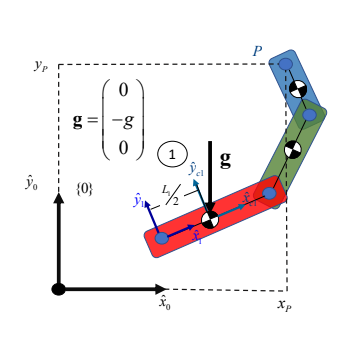

Figura 12. Se calculara la energia potencial de los eslabones del roboto SCARA

La fórmula utilizada es:
$$
U_i = -m_i \mathbf{g}^T \mathbf{p}_{O\_Ci}
$$

Donde:
* $m_i$ es la masa del eslabón $i$ (`m_1`, `m_2`, `m_3`).
* $\mathbf{g}^T$ es la transpuesta del vector de gravedad (`g_v`).
* $\mathbf{p}_{O\_Ci}$ es el vector de posición del centro de masa del eslabón $i$ con respecto a la base {O} (`p_O_C1`, `p_O_C2`, `p_O_C3`).

El código calcula esta energía potencial para cada eslabón individualmente.

**NOTA**

Dado que la ecuacion **La** es muy larga y no se vizualiza bien en la salida que da jupyter notebook se uso la funcion disp() para mostrarla bien sin que se vaya al otro renglon.

In [26]:
%Cálculo del Lagrangeano
disp('La ecuación completa para La es:')
La = (k_1+k_2+k_3)-(u_1+u_2+u_3);
disp(La)


La ecuación completa para La es:


**Cálculo del Lagrangeano (L)**

Este bloque calcula el **Lagrangeano** (`La`) del sistema robótico. El Lagrangeano es una función escalar fundamental en la mecánica Lagrangiana, definida como la **diferencia entre la energía cinética total (K) y la energía potencial total (U)** del sistema:

$$
L = K - U = (k_1 + k_2 + k_3) - (u_1 + u_2 + u_3)
$$

* **`La = (k_1+k_2+k_3)-(u_1+u_2+u_3)`**: Esta línea implementa directamente la definición, sumando las energías cinéticas individuales (`k_1`, `k_2`, `k_3`) y restando la suma de las energías potenciales individuales (`u_1`, `u_2`, `u_3`) calculadas previamente.
* **`disp(La)`**: Muestra la expresión simbólica resultante del Lagrangeano como texto. Se usa `disp` para evitar problemas de formato con ecuaciones muy largas.

**NOTA**

Dado que la ecuacion **D_theta1, tao_1, D_theta2, tao_2, D_theta3, tao_3 y tao** es muy larga y no se vizualiza bien en la salida que da jupyter notebook se uso la funcion disp() para mostrarla bien sin que se vaya al otro renglon.

In [27]:
%Calculo de los pares
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3
disp('La ecuación completa para D_theta1 es:')
D_theta1=diff(La,theta_dot_O_1);
disp(D_theta1)

La ecuación completa para D_theta1 es:


**Cálculo de los Pares**

Para obtener las ecuaciones dinámicas que describen los **pares (torques)** necesarios en cada articulación, se aplica la **ecuación de Euler-Lagrange** a cada grado de libertad del robot ($i = 1, 2, 3$):

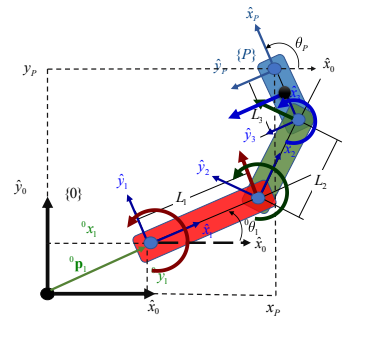

Figura 13. Se deben tomar encuenta las articulacione ya que ahi ejercera el motor el par en el robot SCARA.

$$
\tau_i = \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right) - \frac{\partial L}{\partial q_i}
$$

Donde $L$ es el Lagrangeano, $q_i$ es la variable de la i-ésima articulación y $\dot{q}_i$ es su velocidad.

**Cálculo para el Primer Par ($\tau_1$)**

El primer paso para calcular $\tau_1$ (correspondiente a $\theta_{O,1}$) es obtener el término $\frac{\partial L}{\partial \dot{\theta}_{O,1}}$.

* **Variables:** Se definen las **aceleraciones angulares** como variables simbólicas (`theta_ddot_O_1`, etc.), aunque no se usan directamente en este paso específico.
* **Cálculo de Derivada Parcial:** La línea `D_theta1=diff(La,theta_dot_O_1)` calcula esta derivada parcial del Lagrangeano (`La`) con respecto a la velocidad de la primera articulación (`theta_dot_O_1`) y la almacena en `D_theta1`.
* **Visualización:** `disp(D_theta1)` muestra la expresión simbólica resultante como texto.

In [28]:
% Cálculo de relación
disp('La ecuación completa para tao_1 es:')
tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1);
disp(tao_1)

disp('La ecuación completa para D_theta2 es:')
D_theta2 = diff(La,theta_dot_1_2);
disp(D_theta2)

disp('La ecuación completa para tao_2 es:')
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2);
disp(tao_2)


disp('La ecuación completa para D_theta3  es:')
D_theta3 = diff(La,theta_dot_2_3);
disp(D_theta3)


disp('La ecuación completa para tao_3 es:')
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3);
disp(tao_3)


disp('La ecuación completa para tao es:')
tao = [tao_1;tao_2;tao_3];
disp(tao)


La ecuación completa para tao_1 es:


La ecuación completa para D_theta2 es:


La ecuación completa para tao_2 es:


La ecuación completa para D_theta3  es:


La ecuación completa para tao_3 es:


La ecuación completa para tao es:


**Cálculo de los Pares ($\tau$)**

Este bloque de código calcula los **pares (torques)** $\tau_1, \tau_2, \tau_3$ necesarios en cada articulación, completando la aplicación de la **ecuación de Euler-Lagrange**:

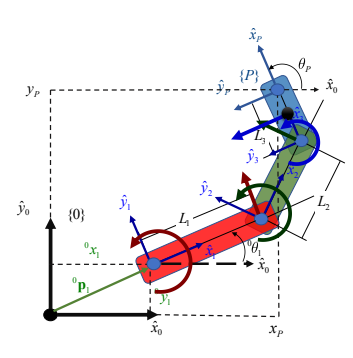

Figura 14. Se deben considerar los torques en las articulaciones ya que ahi se genera el par que se transmiten a las articulaciones del roboto SCARA

$$
\tau_i = \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right) - \frac{\partial L}{\partial q_i}
$$

* **Derivada Total:** Para cada articulación $i$ (correspondiente a $\theta_{O,1}, \theta_{1,2}, \theta_{2,3}$), el código calcula la **derivada total con respecto al tiempo** del término $\frac{\partial L}{\partial \dot{q}_i}$ (almacenado previamente en `D_theta1`, `D_theta2`, `D_theta3`). Esto se hace aplicando la regla de la cadena:
    $$
    \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{q}_i} \right) = \sum_{j=1}^{3} \left( \frac{\partial}{\partial q_j}\left(\frac{\partial L}{\partial \dot{q}_i}\right)\dot{q}_j + \frac{\partial}{\partial \dot{q}_j}\left(\frac{\partial L}{\partial \dot{q}_i}\right)\ddot{q}_j \right)
    $$
    Esto se implementa en las líneas que calculan `tao_1`, `tao_2`, y `tao_3`, derivando `D_theta` con respecto a cada $q_j$ y $\dot{q}_j$, y multiplicando por $\dot{q}_j$ y $\ddot{q}_j$ respectivamente.

* **Derivada Parcial del Lagrangeano:** Luego, se resta el término $\frac{\partial L}{\partial q_i}$ (calculado como `diff(La, theta_...)`).

* **Vector de Pares:** Finalmente, los pares individuales se agrupan en el **vector de pares** `tao`.

* **Visualización:** Las funciones `disp()` se usan para mostrar las expresiones simbólicas de los términos intermedios y el vector final de pares como texto.

**NOTA**

Dado que la ecuacion **M1, M2, M3 y M_theta** es muy larga y no se vizualiza bien en la salida que da jupyter notebook se uso la funcion disp() para mostrarla bien sin que se vaya al otro renglon.

In [29]:
% Cálculo de la matriz de inercia
disp('La ecuación completa para M1 es:')
M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0]);
disp(M1)

disp('La ecuación completa para M2 es:')
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0]);
disp(M2)

disp('La ecuación completa para M3 es:')
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0]);
disp(M3)

disp('La ecuación completa para M_theta es:')
M_theta = collect([M1 M2 M3],[m_1,m_2,m_3]);
disp(M_theta)


La ecuación completa para M1 es:


La ecuación completa para M2 es:


La ecuación completa para M3 es:


La ecuación completa para M_theta es:


**Cálculo de la Matriz de Inercia M(q)**

Este bloque de código extrae la **matriz de inercia** $M(q)$ del robot a partir de las ecuaciones de par (`tao`) obtenidas previamente. La matriz de inercia relaciona las **aceleraciones articulares** ($\ddot{q}$) con los **pares inerciales**.

El método se basa en la forma general de la ecuación dinámica:
$$
\tau = M(q)\ddot{q} + C(q, \dot{q})\dot{q} + G(q)
$$
Si se anulan las velocidades ($\dot{q}=0$) y la gravedad ($g=0$), la ecuación se simplifica a $\tau = M(q)\ddot{q}$.

* **Extracción de Columnas:** Para obtener la **primera columna** de $M(q)$, se sustituye $\ddot{q} = [1; 0; 0]$, $\dot{q} = [0; 0; 0]$ y $g=0$ en el vector `tao`. El resultado es `M1`.
* De manera similar, se obtiene la **segunda columna** (`M2`) sustituyendo $\ddot{q} = [0; 1; 0]$ y la **tercera columna** (`M3`) con $\ddot{q} = [0; 0; 1]$.
* **Ensamblaje de la Matriz:** Finalmente, las columnas `M1`, `M2`, `M3` se combinan para formar la **matriz de inercia completa** `M_theta`. La función `collect` agrupa los términos en función de las masas ($m_1, m_2, m_3$) para simplificar la visualización.
* **Visualización:** Las funciones `disp()` se utilizan para mostrar las columnas y la matriz final como texto.

**Cálculo del Vector de Pares de Coriolis y Fuerzas Centrífugas**

In [30]:
%Cálculo del vector de pares de Coriolis y Fuerzas centrifugas
disp('La ecuación completa para V_theta es:')
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0]);
disp(V_theta)

disp('La ecuación completa para G_theta es:')
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g]);
disp(G_theta)


La ecuación completa para V_theta es:


La ecuación completa para G_theta es:


**Cálculo de los Vectores C(q, q̇)q̇ y G(q)**

Este bloque de código aísla los componentes restantes del modelo dinámico a partir del vector de par total `tao`.

**Cálculo del Vector de Coriolis y Fuerzas Centrífugas (V_theta)**

Se calcula el vector $C(q, \dot{q})\dot{q}$, que agrupa los términos de par dependientes de las **velocidades articulares** ($\dot{q}$). Estos términos representan las fuerzas **Coriolis** (interacciones entre movimientos rotacionales y lineales) y **centrífugas** (debidas a la rotación de los eslabones).

* **Método:** Se toma el vector de par `tao` y se sustituyen todas las **aceleraciones articulares** (`theta_ddot`) y la **gravedad** (`g`) por **cero**. Esto elimina los términos inerciales ($M\ddot{q}$) y gravitacionales ($G$), dejando únicamente los términos que dependen de las velocidades ($\dot{q}$).
* **Resultado:** La variable `V_theta` almacena este vector $C(q, \dot{q})\dot{q}$.

**Cálculo del Vector de Pares Gravitacionales (G_theta)**

Se calcula el vector $G(q)$, que representa los pares necesarios para contrarrestar el **efecto de la gravedad** sobre los eslabones del robot.

* **Método:** Se toma el vector de par `tao` y se sustituyen todas las **aceleraciones** (`theta_ddot`) y las **velocidades** (`theta_dot`) por **cero**. Esto elimina los términos inerciales ($M\ddot{q}$) y de Coriolis/centrífugos ($C\dot{q}$), dejando solo los términos que dependen de la gravedad (`g`).
* **Resultado:** La variable `G_theta` almacena este vector $G(q)$.

* **Visualización:** Las funciones `disp()` se utilizan para mostrar las expresiones simbólicas de `V_theta` y `G_theta` como texto.

**Modelo Dinámico Directo**

El **modelo dinámico directo** resuelve el problema opuesto al inverso: calcula la **aceleración** ($\ddot{q}$) que experimentarán las articulaciones si se les aplica un conjunto conocido de **torques** ($\tau$). Se obtiene despejando $\ddot{q}$ de la ecuación dinámica:

$$
\ddot{q} = M(q)^{-1} (\tau - C(q, \dot{q})\dot{q} - G(q))
$$

Debido a la alta complejidad algebraica de la **matriz de inercia inversa** ($M(q)^{-1}$), el modelo directo no se expande simbólicamente en este reporte. En su lugar, se presenta a través de sus **componentes fundamentales** ($M(q)$, $C(q, \dot{q})\dot{q}$, y $G(q)$), los cuales fueron calculados y mostrados en el bloque de código anterior.

In [31]:
%Componentes del modelo dinámico.


disp('Matriz de Inercia M(q):');
disp(M_theta)

disp('Vector de Coriolis y Fuerzas Centrífugas C(q, q_dot)q_dot:');
disp(V_theta)

disp('Vector de Gravedad G(q):');
disp(G_theta)

Matriz de Inercia M(q):


Vector de Coriolis y Fuerzas Centrífugas C(q, q_dot)q_dot:


Vector de Gravedad G(q):


**Componentes del Modelo Dinámico**

Este bloque de código final muestra los **componentes fundamentales** del modelo dinámico del robot, los cuales fueron calculados en los pasos anteriores. Se utiliza la función `disp()` para mostrar las expresiones simbólicas como texto, asegurando la legibilidad del reporte.

* `disp('Matriz de Inercia M(q):'); disp(M_theta)`: Muestra la **Matriz de Inercia** ($M(q)$) del robot, almacenada en la variable `M_theta`.
* `disp('Vector de Coriolis y Fuerzas Centrífugas C(q, q_dot)q_dot:'); disp(V_theta)`: Muestra el **Vector de Coriolis y Fuerzas Centrífugas** ($C(q, \dot{q})\dot{q}$), almacenado en `V_theta`.
* `disp('Vector de Gravedad G(q):'); disp(G_theta)`: Muestra el **Vector de Pares Gravitacionales** ($G(q)$), almacenado en `G_theta`.



# Conclusion

En el presente reporte se cumplió el objetivo de desarrollar y documentar los **modelos matemáticos completos** que describen la cinemática y la dinámica de un robot manipulador tipo SCARA. La "hipótesis" de este trabajo —que es posible representar el comportamiento de un robot complejo a través de principios físicos y matemáticos fundamentales— se comprobó exitosamente.

Se demostró cómo, a partir del método de **transformaciones homogéneas**, es posible obtener los modelos de postura, velocidad y aceleración, tanto en su forma directa como inversa. Asimismo, la aplicación de la formulación de **Euler-Lagrange** permitió derivar el modelo dinámico, revelando la **compleja relación** entre los pares del motor y el movimiento resultante. **No se anticipaba la profunda interconexión y complejidad** con la que todos estos modelos están involucrados para describir completamente al robot.

El análisis del modelo dinámico se profundizó al descomponerlo en sus componentes físicos fundamentales: la matriz de inercia **M(q)**, el vector de Coriolis y fuerzas centrífugas **C(q, q̇)q̇**, y el vector de gravedad **G(q)**, proporcionando una comprensión estructurada de la física del sistema. Afortunadamente, herramientas computacionales como **MATLAB** facilitan enormemente estos desarrollos, permitiendo realizar cálculos simbólicos complejos que serían extremadamente tediosos o propensos a errores si se **hicieran manualmente**. Esto hace que los conceptos sean **un poco más entendibles**, aunque se reconoce que para alcanzar una comprensión al 100%, se requeriría **profundizar más** de lo que permite el **tiempo limitado de un solo semestre**. Sería de **mucha ayuda poder ver todo esto de manera más visual** para complementar las derivaciones matemáticas. 

Como **futurización de los resultados**, los modelos obtenidos son la base indispensable para aplicaciones prácticas como la **simulación**, la **planificación de trayectorias** y el **diseño de algoritmos de control avanzados** (e.g., control por par calculado) para tareas de alta precisión.

El desarrollo del reporte también presentó **retos técnicos** al integrar el código simbólico de MATLAB en el entorno de Jupyter Notebook. Se requirió la **instalación de un kernel específico de MATLAB** para una mejor compatibilidad. Además, la visualización de **ecuaciones extensas**, particularmente en el modelo dinámico, presentó dificultades de formato, como saltos de línea inesperados, lo que requirió ajustes manuales (como ocultar salidas intermedias o usar la función `latex()` y celdas Markdown) para mantener la **claridad y profesionalismo** del documento.

Este ejercicio demuestra que la **robótica formal es mucho más compleja** que las implementaciones más extendidas en la Facultad de Ingeniería, como el simple control de servomotores con Arduino o ESP32, requiriendo un entendimiento profundo de la cinemática y dinámica subyacente.

En definitiva, este trabajo representa la aplicación exitosa de los conocimientos teóricos del curso, superando los desafíos técnicos y matemáticos, y sentando las bases para el análisis y control de sistemas robóticos más complejos.

# Referencias

[1] E. Peña Medina, “Presentaciones teoria robotica,” Apuntes de clase, Facultad de Ingeniería, Universidad Nacional Autónoma de México, 2023.

[2] E. Peña Medina, “Propuesta de temario Robotica 2020,” Apuntes de clase, Facultad de Ingeniería, Universidad Nacional Autónoma de México, 2020.